<a href="https://colab.research.google.com/github/joshivedant248/DataScienceProjects/blob/main/Drinking_Water_Potablity_Prediction_Using_ML_and_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Name:Drinking Water Potablity Prediction Using ML and AutoML***


---


TimeLine of the Project:-

* Importing Libraries and Dataset

* Data Analysis and PreProcessing

* Feature Engineering

* Model Building using ML

* Model Building and prediction using H20 Auto ML

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
#Loading dataset
df=pd.read_csv('/content/drinking_water_potability.csv')

In [ ]:
df.head(100)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
95,6.140878,197.876090,26687.87448,7.587196,329.231853,548.072761,15.836330,41.263648,5.359460,0
96,7.077874,220.670540,23873.37821,6.181840,341.987234,333.050786,10.661799,90.297770,4.764508,0
97,5.488314,135.802362,21485.15320,8.187416,280.603287,441.331138,14.860263,88.287346,5.066786,0
98,7.205559,120.327615,24627.86756,6.202469,289.768697,418.433290,13.643147,63.733732,3.710053,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

***Data Analysis***


---

* Basic Idea: We will try to analyse the data.
* Steps would be Handling the NULL Values, Analysing the data using Pair,Box plots and Heatmaps to study correlation between the data. 

In [ ]:
#Series.value_counts() function return a Series containing counts of unique values.
#The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
#Excludes NA values by default.
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

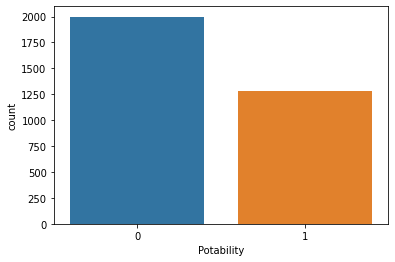

In [ ]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
sns.countplot(data=df,x=df.Potability)

* We will use count plot to check if the data is imbalanced or not.
* We can see that the data is not that imbalance. 
* It has a ratio of around 60:40. 
* The number of datapoints for which the value of water is 1 is less which means water the sample taken mostly from sources which are not potable and thus not good for drinking water



**Handling Null Values**

In [ ]:
#The function dataframe.isnull().sum().sum() returns the number of missing values in the dataset.
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

* We can see that for only ph, Sulfate and Trihalomethanes we have Null Values.

In [ ]:
null=['ph','Sulfate','Trihalomethanes']

* Now we will try to plot the distribution plot to see how the values are distributed and thus will deal with null values
* We can replace the Null Values with mean values. 

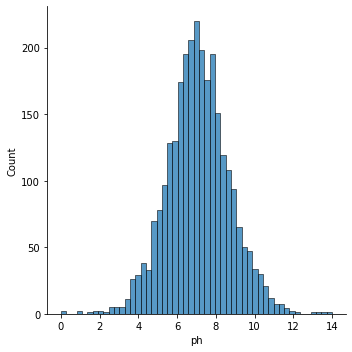

In [ ]:
sns.displot(df.ph)
df['ph']=df['ph'].replace(np.nan,df.ph.mean())

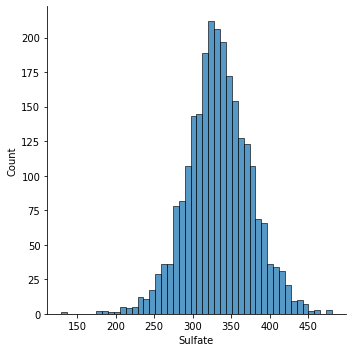

In [ ]:
sns.displot(df.Sulfate)
df['Sulfate']=df['Sulfate'].replace(np.nan,df.ph.mean())

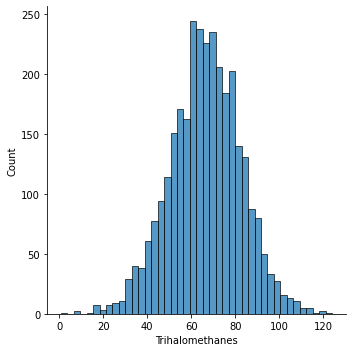

In [ ]:
sns.displot(df.Trihalomethanes)
df['Trihalomethanes']=df['Trihalomethanes'].replace(np.nan,df.ph.mean())

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

* Now we have no Null Values left

**Creating PairPlot**






* Pairplot visualization comes handy when you want to go for Exploratory data analysis (“EDA”).

* Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.
* Plot pairwise relationships in a data-set.
* Pairplot is a module of seaborn library which provides a high-level interface for drawing attractive and informative statistical graphics.

* Read Further:-https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6

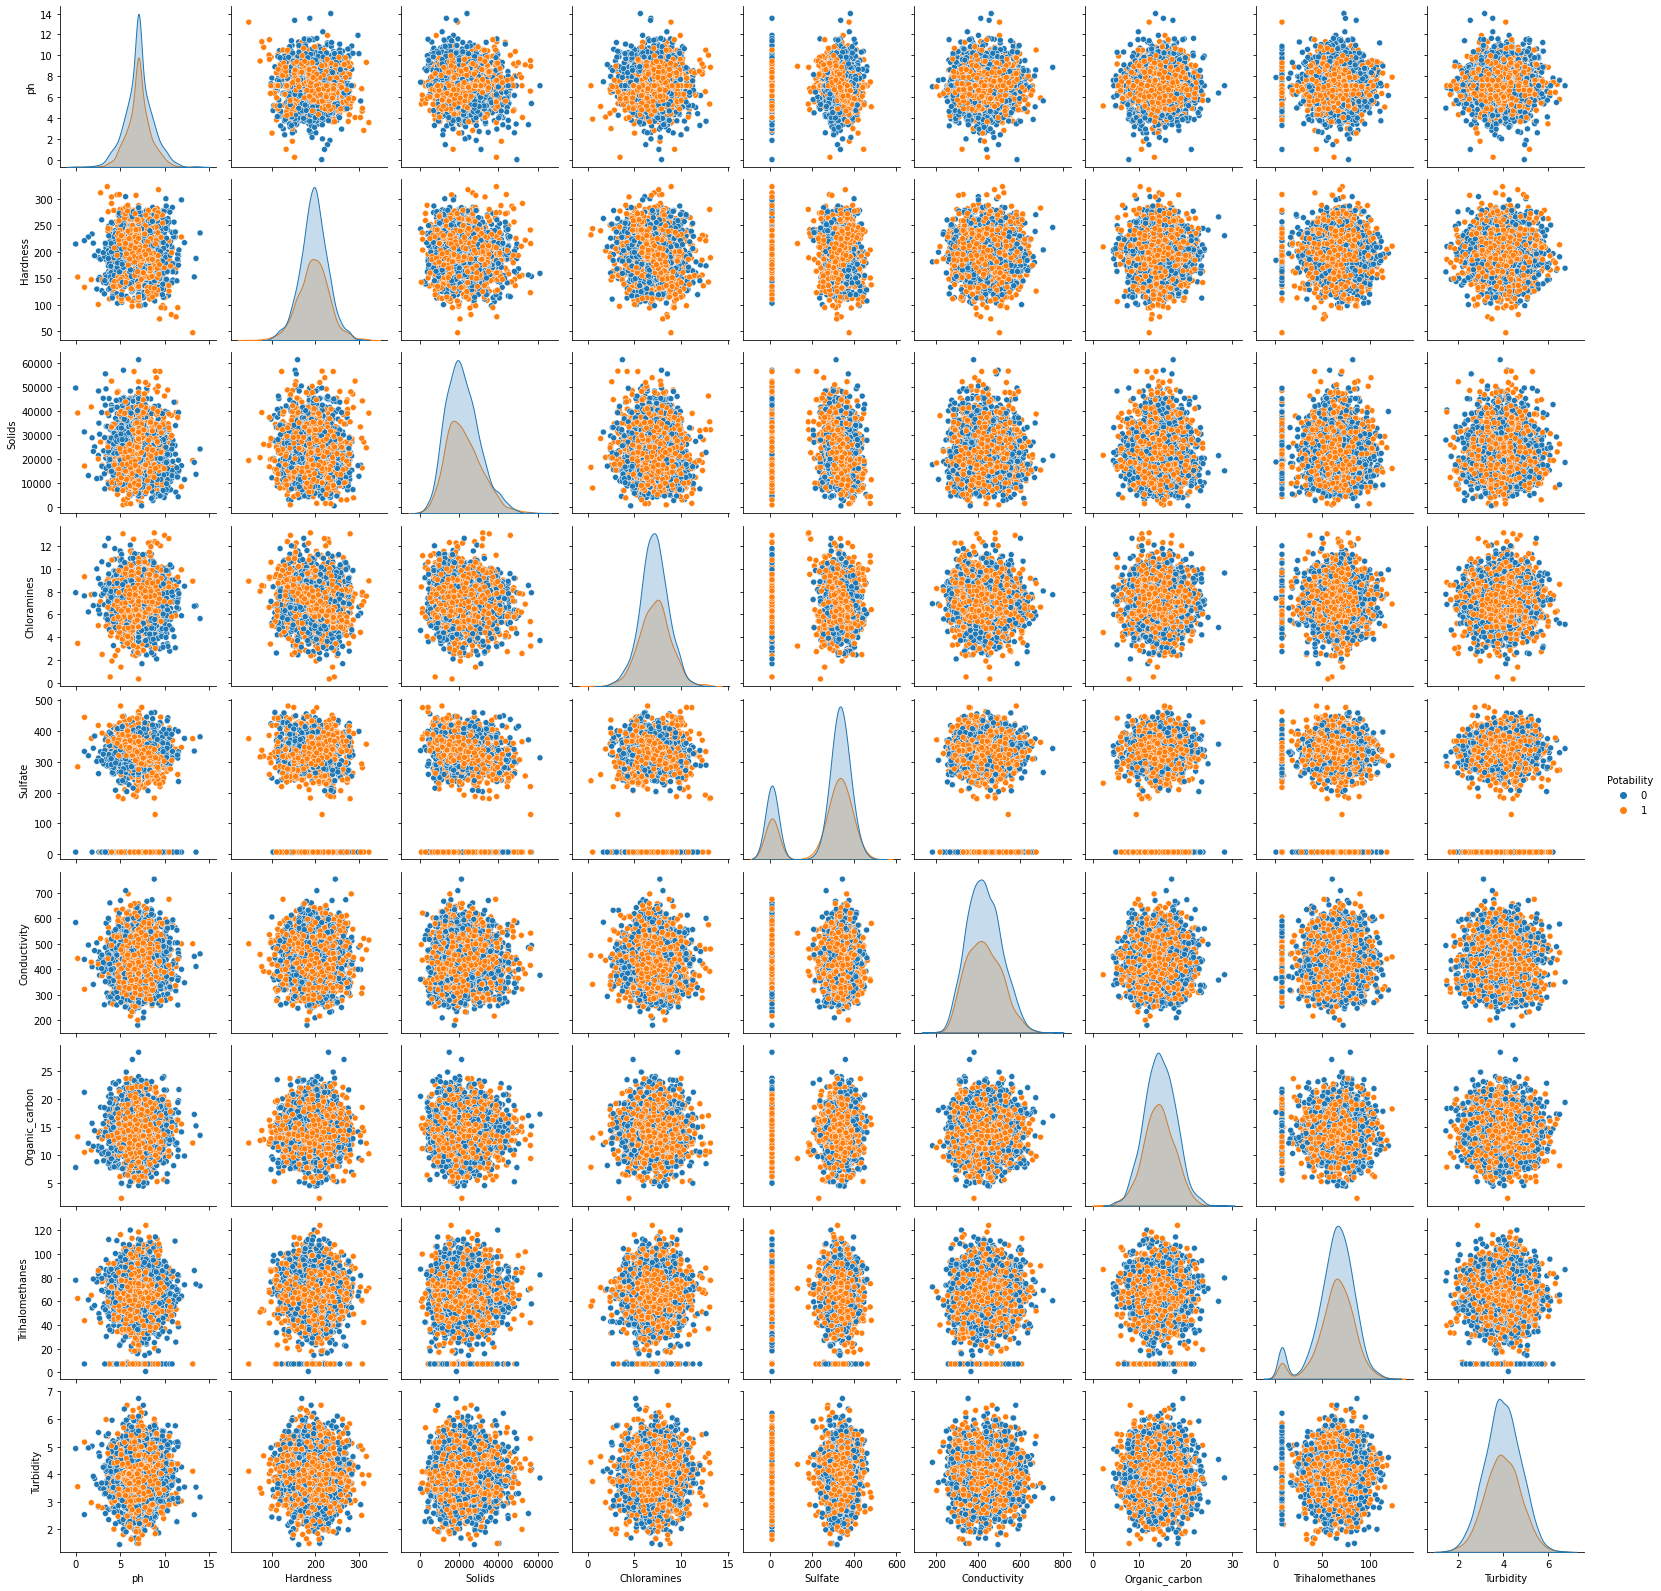

In [ ]:
sns.pairplot(data=df,hue='Potability')

* As we can see data is mixed in nature i.e.
Potablity is not strongly dependent or independent upon other features.
* So we will try another analysis technique, let us try Box Plots.

**Box Plot**

* A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.
* In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median.
* Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.
* Read more:-https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

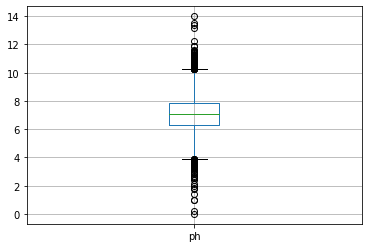

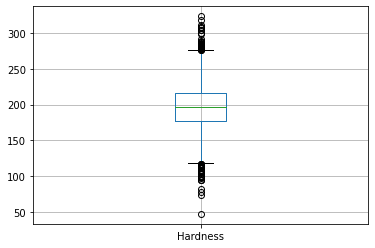

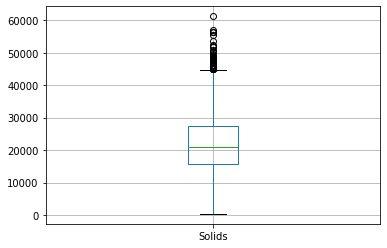

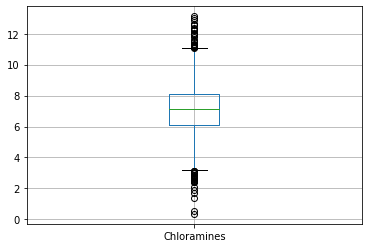

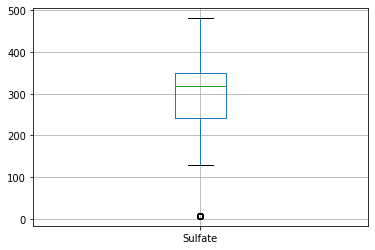

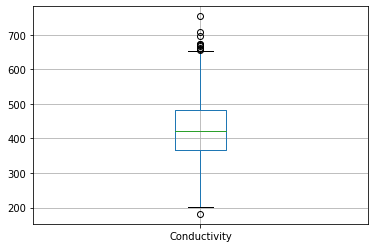

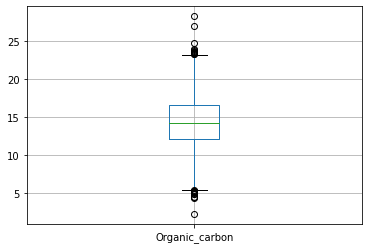

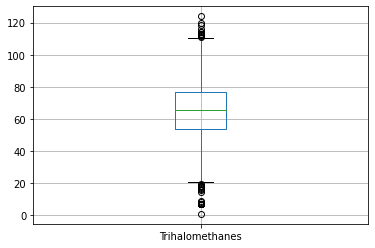

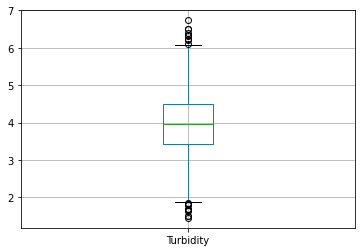

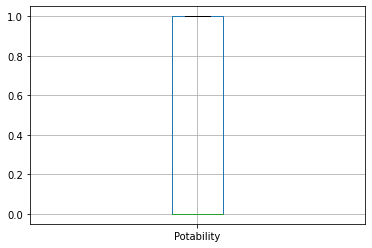

In [ ]:
for column in df.columns:
  plt.figure()
  df.boxplot([column])

**Heat Maps**

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.006643,0.017192,0.040061,0.001285,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.031519,-0.023915,0.003610,-0.006384,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.027434,0.013831,0.010242,-0.022355,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.002636,-0.020486,-0.012653,0.015411,0.002363,0.023779
Sulfate,0.006643,-0.031519,-0.027434,0.002636,1.000000,-0.017994,0.029434,-0.012451,0.000191,0.011417
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.017994,1.000000,0.020966,0.015401,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.029434,0.020966,1.000000,-0.013616,-0.027308,-0.030001
Trihalomethanes,0.001285,-0.006384,-0.022355,0.015411,-0.012451,0.015401,-0.013616,1.000000,-0.019650,0.020349
Turbidity,-0.036222,-0.014449,0.019546,0.002363,0.000191,0.005798,-0.027308,-0.019650,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,0.011417,-0.008128,-0.030001,0.020349,0.001581,1.000000


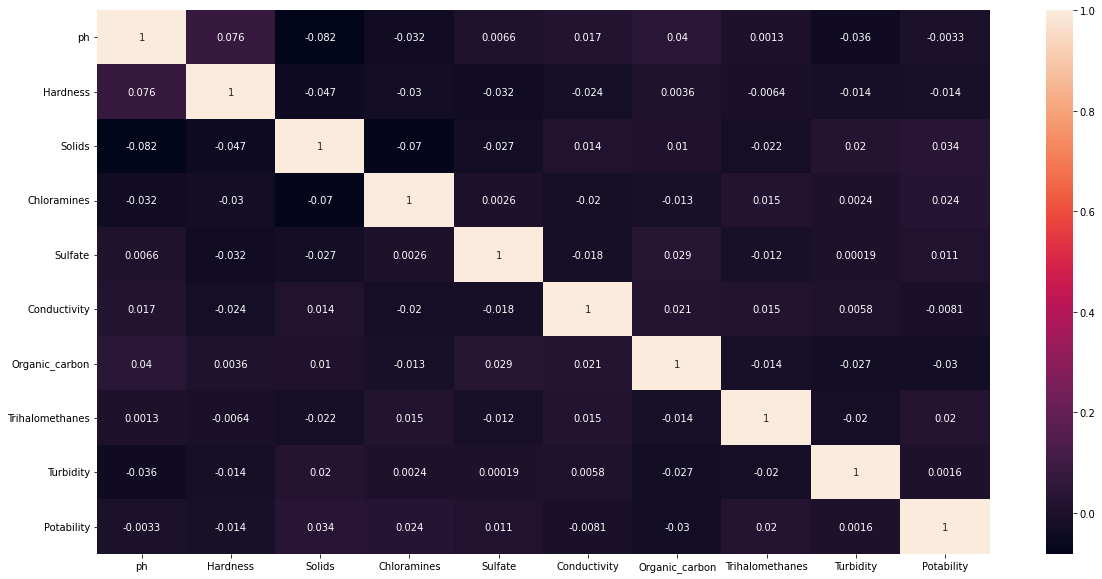

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

* Negative Correlation means if a variable increases the other decreases and vice versa for positive corelation.
* We can see from HeatMaps that few of the data is negatively distributed.

***Feature Engineering***


---
* Basic Idea: In Feature Engineering we are mainly interested in finding feature importance.
* In correlation part we were unable to find specific features so we will use ExtractTree Classifier to plot feature dependence plot


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
x=df.drop(['Potability'],axis=1)
y=df.Potability

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [ ]:
Ext=ExtraTreesClassifier()
Ext.fit(x,y)

ExtraTreesClassifier()

In [ ]:
print(Ext.feature_importances_)

[0.12445782 0.11833758 0.11495783 0.11462982 0.11039229 0.10508815
 0.10449193 0.10344118 0.1042034 ]


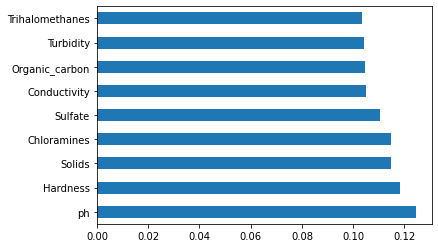

In [ ]:
feature=pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')

As we can see Importance of feature is not that specific and Potability depends upon almost all the features.

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,7.080795,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,7.080795,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Standardize our data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
scaled=scale.fit_transform(x)

In [ ]:
scaled

array([[ 0.        ,  0.25919471, -0.13947087, ..., -1.18065057,
         1.15634116, -1.28629758],
       [-2.28933938, -2.03641367, -0.38598665, ...,  0.27059724,
        -0.35062157,  0.68421789],
       [ 0.69286779,  0.84766483, -0.24004734, ...,  0.78111686,
         0.14532905, -1.16736546],
       ...,
       [ 1.59125368, -0.62682923,  1.27080989, ..., -0.98132923,
         0.31367518, -0.85600678],
       [-1.32951593,  1.0413545 , -1.14405809, ..., -0.94206382,
         0.68930214,  0.95079738],
       [ 0.5401509 , -0.03854623, -0.52581194, ...,  0.56094007,
         0.74878236, -2.12445866]])

In [ ]:
 scaled_df=pd.DataFrame(scaled,columns=x.columns)
 scaled_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.259195,-0.139471,0.112415,0.783094,1.708954,-1.180651,1.156341,-1.286298
1,-2.289339,-2.036414,-0.385987,-0.307694,-1.730009,2.062575,0.270597,-0.350622,0.684218
2,0.692868,0.847665,-0.240047,1.360594,-1.730009,-0.094032,0.781117,0.145329,-1.167365
3,0.840950,0.547651,0.000493,0.592008,0.702227,-0.778830,1.255134,1.812498,0.848412
4,1.368569,-0.464429,-0.460249,-0.363698,0.377166,-0.343939,-0.824357,-1.546439,0.138786


Data is now ready for Model Building

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(scaled_df,y,test_size=0.3,random_state=0)

In [ ]:
x_test.shape

(983, 9)

***Model Development***


---
Let us use the following models:
* Logistic Regression
* SVM
* Random Forest


In [ ]:
#importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

**Logistic Regression**

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_train_hat=lr.predict(x_train)
y_test_hat=lr.predict(x_test)
print('Test Performance')
print('------------------------------')
print(classification_report(y_test,y_test_hat))

print('Roc_auc score')
print('------------------------------')
print(roc_auc_score(y_test,y_test_hat))
print('')

print('Confusion Matrix')
print('------------------------------')
print(confusion_matrix(y_test,y_test_hat))
print('')

print('Confusion Matrix')
print('------------------------------')
print("train data accuracy score:",accuracy_score(y_test,y_test_hat)*100)
print("test data accuracy score:", accuracy_score(y_train,y_train_hat)*100)

Test Performance
------------------------------
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       610
           1       0.50      0.00      0.01       373

    accuracy                           0.62       983
   macro avg       0.56      0.50      0.39       983
weighted avg       0.57      0.62      0.48       983

Roc_auc score
------------------------------
0.500520810442579

Confusion Matrix
------------------------------
[[609   1]
 [372   1]]

Confusion Matrix
------------------------------
train data accuracy score: 62.05493387589013
test data accuracy score: 60.53205407762756


**SVM**

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
y_train_hat=svm.predict(x_train)
y_test_hat=svm.predict(x_test)
print('Test Performance')
print('------------------------------')
print(classification_report(y_test,y_test_hat))

print('Roc_auc score')
print('------------------------------')
print(roc_auc_score(y_test,y_test_hat))
print('')

print('Confusion Matrix')
print('------------------------------')
print(confusion_matrix(y_test,y_test_hat))
print('')

print('Confusion Matrix')
print('------------------------------')
print("train data accuracy score:",accuracy_score(y_test,y_test_hat)*100)
print("test data accuracy score:", accuracy_score(y_train,y_train_hat)*100)

Test Performance
------------------------------
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       610
           1       0.60      0.18      0.28       373

    accuracy                           0.64       983
   macro avg       0.62      0.55      0.52       983
weighted avg       0.63      0.64      0.58       983

Roc_auc score
------------------------------
0.5547883795543445

Confusion Matrix
------------------------------
[[564  46]
 [304  69]]

Confusion Matrix
------------------------------
train data accuracy score: 64.39471007121058
test data accuracy score: 69.69036197121675


**Random Forest**

In [ ]:
rf=RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(x_train,y_train)
y_train_hat=lr.predict(x_train)
y_test_hat=lr.predict(x_test)
print('Test Performance')
print('------------------------------')
print(classification_report(y_test,y_test_hat))

print('Roc_auc score')
print('------------------------------')
print(roc_auc_score(y_test,y_test_hat))
print('')

print('Confusion Matrix')
print('------------------------------')
print(confusion_matrix(y_test,y_test_hat))
print('')

print('Confusion Matrix')
print('------------------------------')
print("train data accuracy score:",accuracy_score(y_test,y_test_hat)*100)
print("test data accuracy score:", accuracy_score(y_train,y_train_hat)*100)

Test Performance
------------------------------
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       610
           1       0.50      0.00      0.01       373

    accuracy                           0.62       983
   macro avg       0.56      0.50      0.39       983
weighted avg       0.57      0.62      0.48       983

Roc_auc score
------------------------------
0.500520810442579

Confusion Matrix
------------------------------
[[609   1]
 [372   1]]

Confusion Matrix
------------------------------
train data accuracy score: 62.05493387589013
test data accuracy score: 60.53205407762756


***Using Auto ML***


---
* In recent years, the demand for machine learning experts has outpaced the supply, despite the surge of people entering the field. 
* To address this gap, there have been big strides in the development of user-friendly machine learning software that can be used by non-experts. 
* The first steps toward simplifying machine learning involved developing simple, unified interfaces to a variety of machine learning algorithms (e.g. H2O).
* Read more: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html


In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing the h20 Python module and H20 Auto ML class**

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')# the h2o.init() makes sure that no prior instances of H2O is running

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5joidrax
  JVM stdout: /tmp/tmp5joidrax/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5joidrax/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,"7 days, 1 hour and 48 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_s1hzw5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#Loading Dataset
df=h2o.import_file('/content/drinking_water_potability.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
nan,204.89,20791.3,7.30021,368.516,564.309,10.3798,86.991,2.96314,0
3.71608,129.423,18630.1,6.63525,nan,592.885,15.18,56.3291,4.50066,0
8.09912,224.236,19909.5,9.27588,nan,418.606,16.8686,66.4201,3.05593,0
8.31677,214.373,22018.4,8.05933,356.886,363.267,18.4365,100.342,4.62877,0
9.09222,181.102,17979,6.5466,310.136,398.411,11.5583,31.998,4.07508,0
5.58409,188.313,28748.7,7.54487,326.678,280.468,8.39973,54.9179,2.55971,0
10.2239,248.072,28749.7,7.51341,393.663,283.652,13.7897,84.6036,2.67299,0
8.63585,203.362,13672.1,4.56301,303.31,474.608,12.3638,62.7983,4.40142,0
nan,118.989,14285.6,7.80417,268.647,389.376,12.706,53.9288,3.59502,0
11.1803,227.231,25484.5,9.0772,404.042,563.885,17.9278,71.9766,4.37056,0


In [ ]:
#H20 can do preprocessing techniques
df_train,df_test=df.split_frame(ratios=[.8])

**Splitting the data**

In [ ]:
y="Potability" #dependent variable
x=df.columns #Independent variable

**Defining the Model**

In [ ]:
aml=H2OAutoML(max_runtime_secs=300,max_models=10,seed=10,verbosity="info",nfolds=2)

**Fitting the model**

In [ ]:
aml.train(x=x,y=y,training_frame=df_train)

AutoML progress: |
20:25:13.254: Project: AutoML_1_20230215_202513
20:25:13.256: Setting stopping tolerance adaptively based on the training frame: 0.01953661662911409
20:25:13.257: Build control seed: 10
20:25:13.266: training frame: Frame key: AutoML_1_20230215_202513_training_py_3_sid_86ee    cols: 10    rows: 2620  chunks: 8    size: 190507  checksum: -7270960355928567831
20:25:13.268: validation frame: NULL
20:25:13.268: leaderboard frame: NULL
20:25:13.268: blending frame: NULL
20:25:13.269: response column: Potability
20:25:13.269: fold column: null
20:25:13.269: weights column: null
20:25:13.332: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), 

key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


**Seeing the Leaderboard**

In [ ]:
lb=aml.leaderboard

In [ ]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230215_202513,0.466859,0.217958,0.436035,0.328182,0.217958
StackedEnsemble_BestOfFamily_1_AutoML_1_20230215_202513,0.467811,0.218847,0.438036,0.32901,0.218847
GBM_2_AutoML_1_20230215_202513,0.46966,0.22058,0.440949,0.330257,0.22058
DRF_1_AutoML_1_20230215_202513,0.47036,0.221239,0.43474,0.331418,0.221239
GBM_4_AutoML_1_20230215_202513,0.471295,0.222119,0.433703,0.330865,0.222119
GBM_3_AutoML_1_20230215_202513,0.47178,0.222576,0.433769,0.330444,0.222576
XRT_1_AutoML_1_20230215_202513,0.473491,0.224193,0.437282,0.333761,0.224193
GBM_1_AutoML_1_20230215_202513,0.477502,0.228008,0.454731,0.335507,0.228008
GLM_1_AutoML_1_20230215_202513,0.486959,0.237129,0.473942,0.342592,0.237129
XGBoost_3_AutoML_1_20230215_202513,0.491243,0.24132,0.431963,0.345609,0.24132


**Getting all the model ids**

In [ ]:
model_ids=list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20230215_202513',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230215_202513',
 'GBM_2_AutoML_1_20230215_202513',
 'DRF_1_AutoML_1_20230215_202513',
 'GBM_4_AutoML_1_20230215_202513',
 'GBM_3_AutoML_1_20230215_202513',
 'XRT_1_AutoML_1_20230215_202513',
 'GBM_1_AutoML_1_20230215_202513',
 'GLM_1_AutoML_1_20230215_202513',
 'XGBoost_3_AutoML_1_20230215_202513',
 'XGBoost_1_AutoML_1_20230215_202513',
 'XGBoost_2_AutoML_1_20230215_202513']

In [ ]:
 aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.21814060250793246
RMSE: 0.4670552456700732
MAE: 0.4399194711508576
RMSLE: 0.3271895383896783
Mean Residual Deviance: 0.21814060250793246
R^2: 0.09617713410113682
Null degrees of freedom: 655
Residual degrees of freedom: 647
Null deviance: 158.6207528698794
Residual deviance: 143.1002352452037
AIC: 882.8116148139334

**Getting Model Details for best performing model**

In [ ]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [ ]:
 output=h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
 output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_1_AutoML_1_20230215_202513',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_1_20230215_202513'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230215_202513_training_py_3_sid_86ee',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230215_202513_training_py_3_sid_86ee'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230215_202513_training_py_3_sid_86ee',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230215_202513_training_py_3_sid_86ee'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sch

In [ ]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [ ]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred

predict
0.311995
0.400654
0.435086
0.489066
0.564712
0.415898
0.365367
0.420094
0.290838
0.396362


 If Probablity greater than 0.5 than it is a 1 else it is 0